In [1]:
import sklearn
from sklearn import ensemble
from sklearn import model_selection
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_test = pd.read_csv('F:\BME590-09\DS_final\Process Books\data_pp_test_30d.csv')
data_train = pd.read_csv('F:\BME590-09\DS_final\Process Books\data_pp_train_30d.csv')
data = pd.read_csv('F:\BME590-09\DS_final\Process Books\data(with_label).csv')

In [3]:
x_test = data_test.copy()
y_test = data_test.copy()
x_train = data_train.copy()
y_train = data_train.copy()

x_test = x_test.drop(['one_year','thirty_days'],axis = 1)
x_train = y_train.drop(['one_year','thirty_days'],axis = 1)
y_test = y_test['thirty_days']
y_train = y_train['thirty_days']


In [4]:
print(x_test.shape,x_train.shape,y_test.shape,y_train.shape)

(19139, 106) (38857, 106) (19139,) (38857,)


In [5]:
param_grid = {
    'n_estimators' : [400],  
    'max_depth' : [30],
    'bootstrap': ['True'],
    'max_features' : ['auto'],
    'oob_score' : ['True'] ,
    'min_samples_leaf' : [1], 
    'min_samples_split' : [3]
}

In [6]:
clf = sklearn.ensemble.RandomForestClassifier(
    n_estimators = 2,
    bootstrap = True,
    max_depth = None
)

In [7]:
model = sklearn.model_selection.GridSearchCV(
    estimator = clf,
    param_grid = param_grid,
    n_jobs = -1,
    verbose = 3,
    scoring = 'accuracy',
    cv = 5
).fit(x_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.2min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished


In [8]:
model.best_estimator_.score(x_test,y_test)

0.9358378180678196

In [62]:
names = x_test.columns.tolist()
importance = model.best_estimator_.feature_importances_

dic = dict(zip(names,importance))
key_drop = [k for k in dic.keys() if  k.endswith('_mv') or k == 'icustay_age_group']
for k in key_drop:
    del dic[k]

import operator
dic = sorted(dic.items(), key=operator.itemgetter(1), reverse = True)

import collections
sorted_dict = collections.OrderedDict(dic)

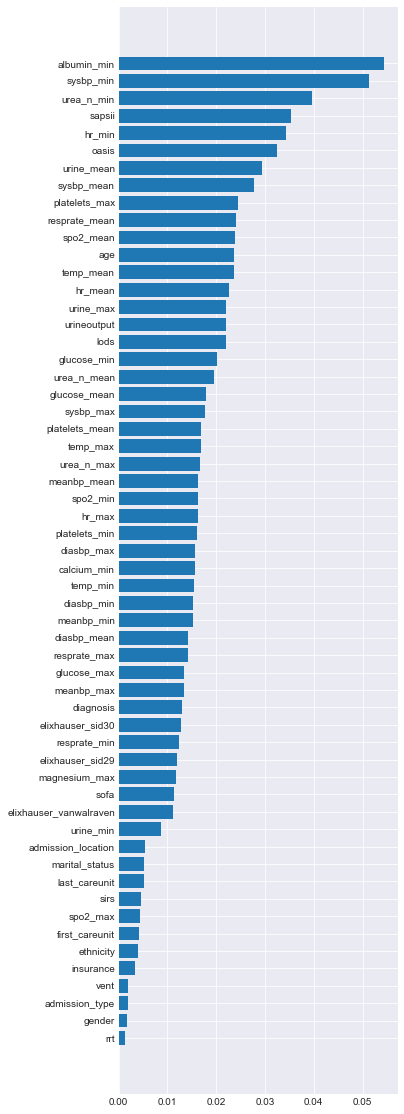

In [61]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize=(5,20))
ax = plt.barh(list(sorted_dict.keys()),list(sorted_dict.values()))
